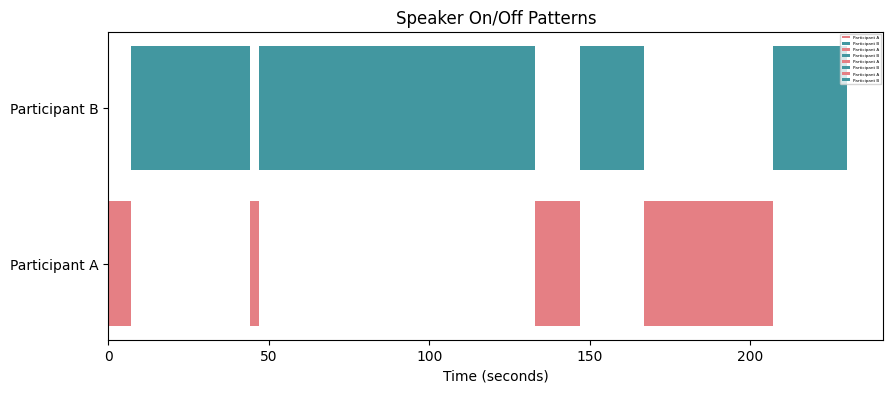

In [34]:
import matplotlib.pyplot as plt

# Defining the speaker intervals
speaker_intervals = [
    (0, 7),    # Speaker 2 - On
    (7, 44),   # Speaker 2 - Off
    (44, 47),  # Speaker 1 - On
    (47, 133), # Speaker 1 - Off
    (133, 147),# Speaker 2 - On
    (147, 167),# Speaker 2 - Off
    (167, 207),# Speaker 1 - On
    (207, 230) # Speaker 1 - Off
]

# Creating a figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# Defining colors for each speaker
colors = {'Participant A': '#E57F84', 'Participant B': '#4297A0'}

# Plotting the on and off periods for each speaker
for speaker, (start, end) in zip(['Participant A', 'Participant B'] * (len(speaker_intervals) // 2), speaker_intervals):
    ax.barh(speaker, end - start, left=start, color=colors[speaker], label=speaker)

# Set labels and legend with adjusted placement and size
ax.set_xlabel('Time (seconds)')
ax.set_title('Speaker On/Off Patterns')
ax.legend(loc='upper right', prop={'size': 3})  # Adjust the location and size

# Show the plot
plt.show()


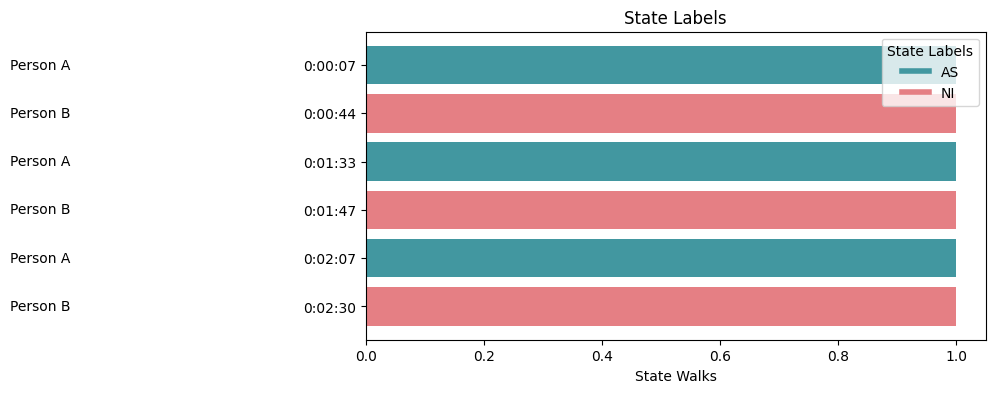

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Definng the data
timestamps = ['0:00:07', '0:00:44', '0:01:33', '0:01:47', '0:02:07', '0:02:30']
participants = ['A', 'B', 'A', 'B', 'A', 'B']
states = ['AS', 'NI', 'AS', 'NI', 'AS', 'NI']

# Creating a figure and axis
fig, ax = plt.subplots(figsize=(8, 4))

# Defining colors for states
state_colors = {'AS': '#4297A0', 'NI': '#E57F84'}

# Plotting state walks
for i, state in enumerate(states):
    color = state_colors[state]
    ax.barh(i, 1, color=color, label=state)

# Set y-axis ticks and labels
ax.set_yticks(np.arange(len(timestamps)))
ax.set_yticklabels(timestamps)

# Set x-axis label
ax.set_xlabel('State Walks')

# Set legend for state labels
legend_labels = [plt.Line2D([0], [0], color=state_colors[state], lw=4, label=state) for state in state_colors]
ax.legend(handles=legend_labels, title='State Labels', loc='upper right')

# Add Person A and Person B labels
for i, participant in enumerate(participants):
    ax.text(-0.5, i, f'Person {participant}', va='center', ha='right', fontsize=10)

# Set title
ax.set_title('State Labels')

# Invert y-axis for a top-down view
ax.invert_yaxis()

# Show the plot
plt.show()


In [66]:
#For condition 1 loss 0% and delay 0ms 


# Definng state patterns for Participant A and B
participant_a_states = ["BR", "BR"]
participant_b_states = ["AS", "AS", "AS", "NI"]

# Definng all possible state patterns
all_states = ["BR", "AS", "NI", "SI"]

# Initializing the confusion matrix with zeros
confusion_matrix = {}

# Initialize the confusion matrix for each state
for state_a in all_states:
    confusion_matrix[state_a] = {}
    for state_b in all_states:
        confusion_matrix[state_a][state_b] = 0

# Iterating through state patterns and count matches and set to 0 for mismatches
for state_a in participant_a_states:
    for state_b in participant_b_states:
        if state_a == state_b:
            confusion_matrix[state_a][state_b] += 1  # Increment by 1 for a match
        else:
            confusion_matrix[state_a][state_b] = 0  # Set to 0 for a mismatch

# Printing the confusion matrix for all state patterns
for state_a in all_states:
    print(f"{state_a}:", end="\t")
    for state_b in all_states:
        print(confusion_matrix[state_a][state_b], end="\t")
    print()



BR:	0	0	0	0	
AS:	0	0	0	0	
NI:	0	0	0	0	
SI:	0	0	0	0	


In [103]:
#For condition 3 loss 15% and delay 500ms 

# Definng state patterns for Participant A and B
participant_a_states = ["SI","AS","SI","BR","AS","BR","AS","AS"]
participant_b_states = ["BR","BR","NI","SI","AS","BR","AS"]

# Initialize counters for matching and mismatching state walks
numMatch_AB = 0
numMismatch_AB = 0

# Creating a function to compare state walks
def compare_state_walks(walk_a, walk_b):
    # Check if the state walks match
    if walk_a == walk_b:
        return True
    else:
        return False

# Creating state walks for Participant A and B
state_walks_a = participant_a_states
state_walks_b = participant_b_states

# Iterating through state walks
for walk_a, walk_b in zip(state_walks_a, state_walks_b):
    if compare_state_walks(walk_a, walk_b):
        numMatch_AB += 1
    else:
        numMismatch_AB += 1

# Calculating divergence for both participants
divergence_A = numMismatch_AB / numMatch_AB 
divergence_B = numMismatch_AB / numMatch_AB 

# Creating a confusion matrix to count mismatched state transitions
confusion_matrix = {
    "BR": {"BR": 0, "AS": 0, "NI": 0, "SI": 0},
    "AS": {"BR": 0, "AS": 0, "NI": 0, "SI": 0},
    "NI": {"BR": 0, "AS": 0, "NI": 0, "SI": 0},
    "SI": {"BR": 0, "AS": 0, "NI": 0, "SI": 0}
}

# Updating the confusion matrix based on state transitions
for walk_a, walk_b in zip(state_walks_a, state_walks_b):
    confusion_matrix[walk_a][walk_b] += 1

# Printing the results
print("Number of matching state walks:", numMatch_AB)
print("Number of mismatching state walks:", numMismatch_AB)
print("Divergence for Participant A:", divergence_A)
print("Divergence for Participant B:", divergence_B)
print("Confusion Matrix:")
for row in confusion_matrix:
    print(row, confusion_matrix[row])


Number of matching state walks: 3
Number of mismatching state walks: 4
Divergence for Participant A: 1.3333333333333333
Divergence for Participant B: 1.3333333333333333
Confusion Matrix:
BR {'BR': 1, 'AS': 0, 'NI': 0, 'SI': 1}
AS {'BR': 1, 'AS': 2, 'NI': 0, 'SI': 0}
NI {'BR': 0, 'AS': 0, 'NI': 0, 'SI': 0}
SI {'BR': 1, 'AS': 0, 'NI': 1, 'SI': 0}


In [104]:
#For condition 4 loss 30% and delay 1000ms 

# Definng state patterns for Participant A and B
participant_a_states = ["SI","AS","SI","BR"]
participant_b_states = ["BR","BR","SI","AS"]

# Initializing counters for matching and mismatching state walks
numMatch_AB = 0
numMismatch_AB = 0

# Creating a function to compare state walks
def compare_state_walks(walk_a, walk_b):
    # Check if the state walks match
    if walk_a == walk_b:
        return True
    else:
        return False

# Creating state walks for Participant A and B
state_walks_a = participant_a_states
state_walks_b = participant_b_states

# Iterating through state walks
for walk_a, walk_b in zip(state_walks_a, state_walks_b):
    if compare_state_walks(walk_a, walk_b):
        numMatch_AB += 1
    else:
        numMismatch_AB += 1

# Calculating divergence for both participants
divergence_A = numMismatch_AB / numMatch_AB 
divergence_B = numMismatch_AB / numMatch_AB 

# Creating a confusion matrix to count mismatched state transitions
confusion_matrix = {
    "BR": {"BR": 0, "AS": 0, "NI": 0, "SI": 0},
    "AS": {"BR": 0, "AS": 0, "NI": 0, "SI": 0},
    "NI": {"BR": 0, "AS": 0, "NI": 0, "SI": 0},
    "SI": {"BR": 0, "AS": 0, "NI": 0, "SI": 0}
}

# Updating the confusion matrix based on state transitions
for walk_a, walk_b in zip(state_walks_a, state_walks_b):
    confusion_matrix[walk_a][walk_b] += 1

# Printing the results
print("Number of matching state walks:", numMatch_AB)
print("Number of mismatching state walks:", numMismatch_AB)
print("Divergence for Participant A:", divergence_A)
print("Divergence for Participant B:", divergence_B)
print("Confusion Matrix:")
for row in confusion_matrix:
    print(row, confusion_matrix[row])

Number of matching state walks: 1
Number of mismatching state walks: 3
Divergence for Participant A: 3.0
Divergence for Participant B: 3.0
Confusion Matrix:
BR {'BR': 0, 'AS': 1, 'NI': 0, 'SI': 0}
AS {'BR': 1, 'AS': 0, 'NI': 0, 'SI': 0}
NI {'BR': 0, 'AS': 0, 'NI': 0, 'SI': 0}
SI {'BR': 1, 'AS': 0, 'NI': 0, 'SI': 1}
